In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/modified_fake_bills.csv')

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,515.43,104.86,104.95,4.52,2.89,112.83
1,True,514.38,103.36,103.66,3.77,2.99,113.09
2,True,518.07,104.48,103.50,4.40,2.94,113.16
3,True,514.08,103.91,103.94,3.62,3.01,113.51
4,True,515.19,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,515.25,104.38,104.17,4.42,3.09,111.28
1496,False,516.57,104.63,104.44,5.27,3.37,110.97
1497,False,515.40,104.01,104.12,5.51,3.36,111.95
1498,False,516.18,104.28,104.06,5.17,3.46,112.25


### Preprocessing & EDA

In [4]:
df['target'] = df['is_genuine'].apply(lambda x: int(x))
df.insert(1, 'target', df.pop('target'))

df

,is_genuine,target,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,1,515.43,104.86,104.95,4.52,2.89,112.83
1,True,1,514.38,103.36,103.66,3.77,2.99,113.09
2,True,1,518.07,104.48,103.50,4.40,2.94,113.16
3,True,1,514.08,103.91,103.94,3.62,3.01,113.51
4,True,1,515.19,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...,...
1495,False,0,515.25,104.38,104.17,4.42,3.09,111.28
1496,False,0,516.57,104.63,104.44,5.27,3.37,110.97
1497,False,0,515.40,104.01,104.12,5.51,3.36,111.95
1498,False,0,516.18,104.28,104.06,5.17,3.46,112.25


In [5]:
df.isnull().sum()
df.dropna(inplace=True)

df

,is_genuine,target,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,1,515.43,104.86,104.95,4.52,2.89,112.83
1,True,1,514.38,103.36,103.66,3.77,2.99,113.09
2,True,1,518.07,104.48,103.50,4.40,2.94,113.16
3,True,1,514.08,103.91,103.94,3.62,3.01,113.51
4,True,1,515.19,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...,...
1495,False,0,515.25,104.38,104.17,4.42,3.09,111.28
1496,False,0,516.57,104.63,104.44,5.27,3.37,110.97
1497,False,0,515.40,104.01,104.12,5.51,3.36,111.95
1498,False,0,516.18,104.28,104.06,5.17,3.46,112.25


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_genuine', 'target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=24)

<function matplotlib.pyplot.show(close=None, block=None)>

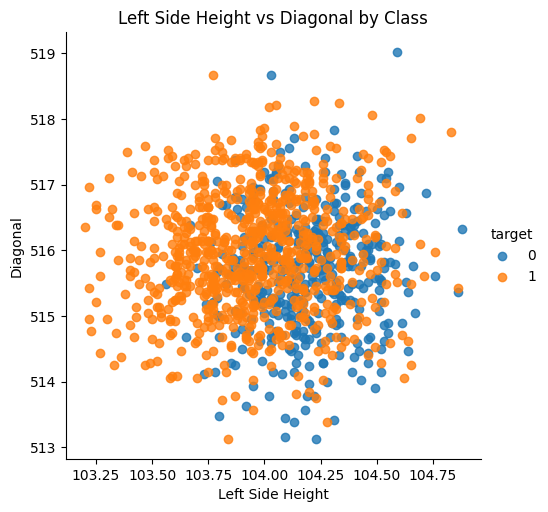

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

from seaborn import lmplot

train_df = pd.concat([X_train[['height_left', 'diagonal']], y_train.rename('target')], axis=1)

sns.lmplot(
    data=train_df, 
    x='height_left', 
    y='diagonal', 
    hue='target', 
    fit_reg=False
)

plt.title("Left Side Height vs Diagonal by Class")
plt.xlabel("Left Side Height")
plt.ylabel("Diagonal")
plt.show

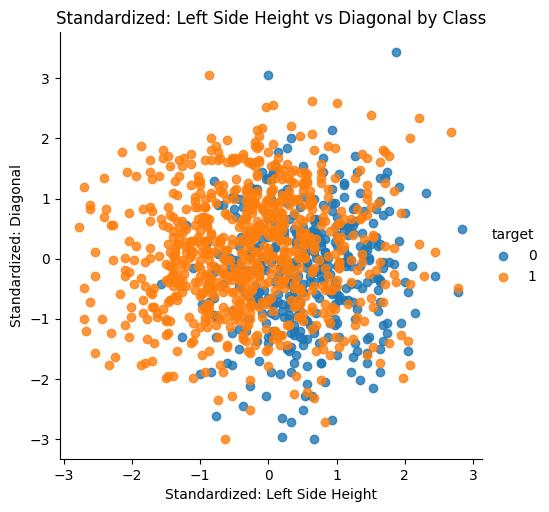

In [8]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(train_df[['height_left', 'diagonal']])
train_df_std = pd.DataFrame(X_train_std, columns=['height_left_std', 'diagonal_std'])
train_df_std['target'] = y_train.values

sns.lmplot(
    data=train_df_std,
    x='height_left_std',
    y='diagonal_std',
    hue='target',
    fit_reg=False,
)

plt.title("Standardized: Left Side Height vs Diagonal by Class")
plt.xlabel("Standardized: Left Side Height")
plt.ylabel("Standardized: Diagonal")
plt.show()

### KNN

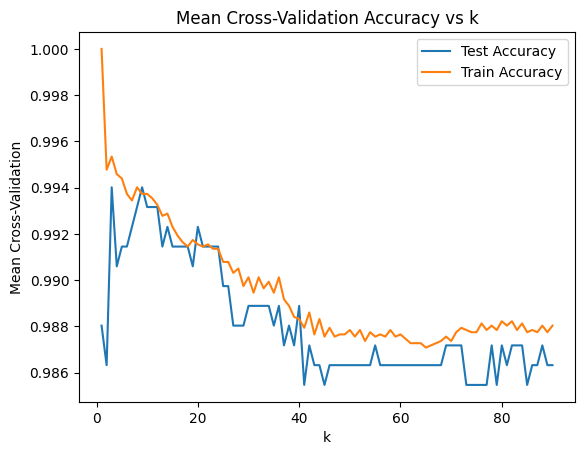

Highest cross-validation accruacy: 0.994017094017094
k with highest cross-validation accruacy: [3, 9]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

cv_results_test = pd.Series(index=np.arange(1, 91), dtype=float)
cv_results_train = pd.Series(index=np.arange(1, 91), dtype=float)

for k in range(1, 91):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_result = cross_validate(
        knn_model, 
        X_train_scaled, 
        y_train, 
        cv=10,
        return_train_score=True,
        scoring='accuracy'
    )
    
    cv_results_test.loc[k] = cv_result['test_score'].mean()
    cv_results_train.loc[k] = cv_result['train_score'].mean()
    
cv_results_test.plot(label="Test Accuracy")
cv_results_train.plot(label="Train Accuracy")
plt.title("Mean Cross-Validation Accuracy vs k")
plt.ylabel("Mean Cross-Validation")
plt.xlabel("k")
plt.legend()
plt.show()

max_val_test = cv_results_test.max()
best_k_test = cv_results_test[cv_results_test == max_val_test].index.tolist()

print(f"Highest cross-validation accruacy: {max_val_test}")
print(f"k with highest cross-validation accruacy: {best_k_test}")

### Feature Selection

In [10]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_

feature_importance = pd.Series(importance, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

length          0.845117
margin_low      0.110925
margin_up       0.029485
diagonal        0.006256
height_left     0.005164
height_right    0.003054
dtype: float64


In [11]:
def Feature_selector(X_train_scaled, y_train, threshold):
    removed_features = []
    cv_results = []
    ks = []
    
    X_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    y_train = np.array(y_train)

    def tune_knn_model(X):
        best_acc = 0
        best_k = 0
        
        k_range = range(1,91)
        
        for k in k_range:
            knn_model = KNeighborsClassifier(n_neighbors=k)
            scores = cross_validate(knn_model, X, y_train, cv=5, scoring='accuracy')
            acc = scores['test_score'].mean()
            
            if acc > best_acc:
                best_acc = acc
                best_k = k
                
        return best_acc, best_k
    
    full_acc, full_k = tune_knn_model(X_df)
    
    while X_df.shape[1] > 1:
        dt = tree.DecisionTreeClassifier()
        dt.fit(X_df, y_train)
        features_importances = pd.Series(dt.feature_importances_, index=X_df.columns)
        least_important_idx = features_importances.idxmin()
        X_new = X_df.drop(columns=[least_important_idx])
        acc, k = tune_knn_model(X_new)

        if acc < threshold*full_acc:
            break
        
        removed_features.append(least_important_idx)
        cv_results.append(acc)
        ks.append(k)
        X_df = X_new
        
    return removed_features, cv_results, ks

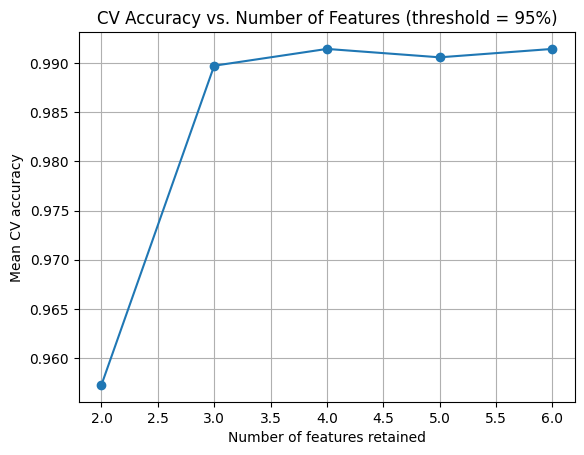

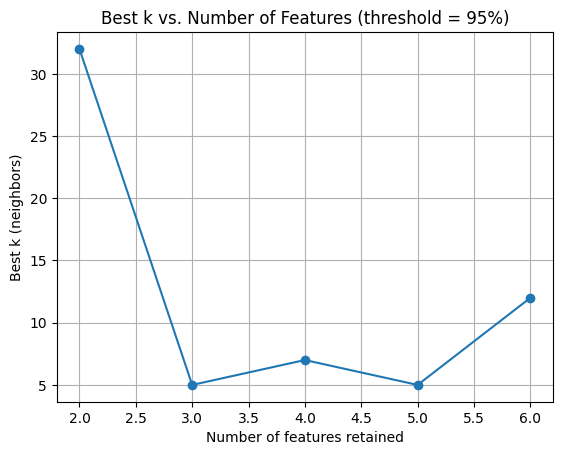

Essential feature count: 2
Essential feature names: ['height_left', 'length']
Best mean CV accuracy: 0.9915
Best k at best accuracy: 12
Number of features at best accuracy: 6


In [12]:
removed_features, cv_results, ks = Feature_selector(
    X_train_scaled, y_train, threshold=0.95
)

total_features=X_train_scaled.shape[1]
num_features_kept = [total_features - i for i in range(len(cv_results))]
order = np.argsort(num_features_kept)
x_features = np.array(num_features_kept)[order]
y_cv = np.array(cv_results)[order]
y_k = np.array(ks)[order]

plt.figure()
plt.plot(x_features, y_cv, marker='o')
plt.xlabel("Number of features retained")
plt.ylabel("Mean CV accuracy")
plt.title("CV Accuracy vs. Number of Features (threshold = 95%)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(x_features, y_k, marker='o')
plt.xlabel("Number of features retained")
plt.ylabel("Best k (neighbors)")
plt.title("Best k vs. Number of Features (threshold = 95%)")
plt.grid(True)
plt.show()

features_dropped = removed_features[1:]
essential_count = num_features_kept[-1]
essential_feature_names = [c for c in X_train.columns if c not in features_dropped]
best_idx = np.argmax(cv_results)
best_acc = cv_results[best_idx]
best_k_at_best = ks[best_idx]
best_feats_at_best = num_features_kept[best_idx]

print(f"Essential feature count: {essential_count}")
print(f"Essential feature names: {essential_feature_names}")
print(f"Best mean CV accuracy: {best_acc:.4f}")
print(f"Best k at best accuracy: {best_k_at_best}")
print(f"Number of features at best accuracy: {best_feats_at_best}")

## Tree-based Models

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "max_depth": randint(1, 10),
    "min_samples_split": randint(2, 50),
}

dt = DecisionTreeClassifier(random_state=24)

rs = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=24,
    n_jobs=-1,
    return_train_score=True,
    scoring="accuracy",
)

rs.fit(X_train_scaled, y_train)

best_score = rs.best_score_
best_params = rs.best_params_

print(f"Best performance using decision tree is {best_score:.9f} with a max depth of {best_params['max_depth']} and a min samples split of {best_params['min_samples_split']}")

rs_dt = rs
best_score_dt = rs_dt.best_score_
best_params_dt = rs_dt.best_params_

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "max_features": ['sqrt', 'log2', 0.1, 0.25, 0.5],
    "n_estimators": randint(10, 200),
}

rf = RandomForestClassifier(random_state=24)

rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=24,
    n_jobs=-1,
    scoring="accuracy",
)

rs.fit(X_train_scaled, y_train)

print(f"Best n_estimators: {rs.best_params_['n_estimators']}, Best Max Features: {rs.best_params_['max_features']}, Best Accuracy: {rs.best_score_:.9f}")

rs_rf = rs
best_score_rf = rs_rf.best_score_
best_params_rf = rs_rf.best_params_

### Bagging Classifier

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

n_features = X_train_scaled.shape[1]
grid = [10, 50, 100, 250]
means = []

for n in grid:
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=24),
        n_estimators=n,
        max_features=n_features,
        random_state=24,
        n_jobs=-1
    )
    score = cross_val_score(bag, X_train_scaled, y_train, cv=5, scoring="accuracy", n_jobs=-1).mean()
    means.append(score)

best_idx = int(np.argmax(means))
best_n = grid[best_idx]
best_acc = means[best_idx]

print(f"Best n_estimators (Bagged Trees): {best_n}, Best Accuracy (Bagged Trees): {best_acc:.9f}")

best_acc_bag = best_acc
best_n_bag = best_n

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate": [0.082, 0.130, 0.099, 0.053, 0.007],
    "max_depth": [1, 2, 3],
    "n_estimators": [1, 10, 50, 100, 300, 500],
}

gb = GradientBoostingClassifier(random_state=24)

gs = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring="accuracy",
)

gs.fit(X_train_scaled, y_train)

bp = gs.best_params_
print(f"n_estimators: {bp['n_estimators']}, Best Learning Rate: {bp['learning_rate']}, Best Max Depth: {bp['max_depth']}, Best Accuracy: {gs.best_score_:.9f}")

gs_gb = gs
best_score_gb = gs_gb.best_score_
best_params_gb = gs_gb.best_params_

## Hyperplane-based Models

### SVM with Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon

param_dist = {
    "C": expon(scale=10),
    "degree": randint(2, 6),
}

svc_poly = SVC(kernel="poly")

rs = RandomizedSearchCV(
    estimator=svc_poly,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=24,
    n_jobs=-1,
    scoring="accuracy",
)

rs.fit(X_train_scaled, y_train)

print(f"Best C: {rs.best_params_['C']}, Best degree: {rs.best_params_['degree']}, Best Accuracy: {rs.best_score_:.9f}")

rs_poly = rs
best_score_svm_poly = rs_poly.best_score_
best_params_svm_poly = rs_poly.best_params_

### SVM with Radial Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

param_dist = {
    "C": expon(scale=10),
    "gamma": ['scale', 'auto', 0.1, 1],
}

svc_rbf = SVC(kernel="rbf")

rs = RandomizedSearchCV(
    estimator=svc_rbf,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=24,
    n_jobs=-1,
    scoring="accuracy",
)

rs.fit(X_train_scaled, y_train)

print(f"Best C: {rs.best_params_['C']}, Best Gamma: {rs.best_params_['gamma']}, Best Accuracy: {rs.best_score_:.9f}")

rs_rbf = rs
best_score_svm_rbf = rs_rbf.best_score_
best_params_svm_rbf = rs_rbf.best_params_

## Summary

In [19]:
import pandas as pd

results = {
    "Model": [
        "Decision Tree",
        "Random Forest",
        "Bagged Trees",
        "Gradient Boosted Trees",
        "SVM (Polynomial Kernel)",
        "SVM (RBF Kernel)",
        "Feature Selection Model"
    ],
    "Best Accuracy": [
        best_score_dt,
        best_score_rf,
        best_acc_bag,
        best_score_gb,
        best_score_svm_poly,
        best_score_svm_rbf,
        best_acc
    ],
    "Key Parameters": [
        f"max_depth: {best_params_dt['max_depth']}, min_samples_split: {best_params_dt['min_samples_split']}",
        f"n_estimators: {best_params_rf['n_estimators']}, max_features: {best_params_rf['max_features']}",
        f"n_estimators: {best_n_bag}",
        f"n_estimators: {best_params_gb['n_estimators']}, learning_rate: {best_params_gb['learning_rate']}, max_depth: {best_params_gb['max_depth']}",
        f"C: {best_params_svm_poly['C']}, degree: {best_params_svm_poly['degree']}",
        f"C: {best_params_svm_rbf['C']}, gamma: {best_params_svm_rbf['gamma']}",
        f"Essential features: {essential_feature_names}, best_k: {best_k_at_best}, best_feats: {best_feats_at_best}"
    ]
}

df_results = pd.DataFrame(results)
df_results

,Model,Best Accuracy,Key Parameters
0,Decision Tree,0.979487,"max_depth: 4, min_samples_split: 8"
1,Random Forest,0.994017,"n_estimators: 92, max_features: 0.25"
2,Bagged Trees,0.985470,n_estimators: 250
3,Gradient Boosted Trees,0.991453,"n_estimators: 300, learning_rate: 0.082, max_d..."
4,SVM (Polynomial Kernel),0.984615,"C: 4.844758649225441, degree: 3"
5,SVM (RBF Kernel),0.993162,"C: 0.543026811257739, gamma: auto"
6,Feature Selection Model,0.985470,"Essential features: ['height_left', 'length'],..."


### Using Test Set with Best Model

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

best_model_rf = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_features=best_params_rf['max_features'],
    random_state=24
)

best_model_rf.fit(X_train_scaled, y_train)

y_pred = best_model_rf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
if cm.shape == (2, 2):
    tn, fp = cm[0, 0], cm[0, 1]
    fallout = fp / (fp + tn)
else:
    fallout = "N/A (multi-class)"

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"Fall-out rate: {fallout}")
print(f"F1 score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9863481228668942
Precision: 0.9849246231155779
Recall: 0.9949238578680203
Fall-out rate: 0.03125
F1 score: 0.98989898989899
Confusion Matrix:
[[ 93   3]
 [  1 196]]


### ROC and AUC

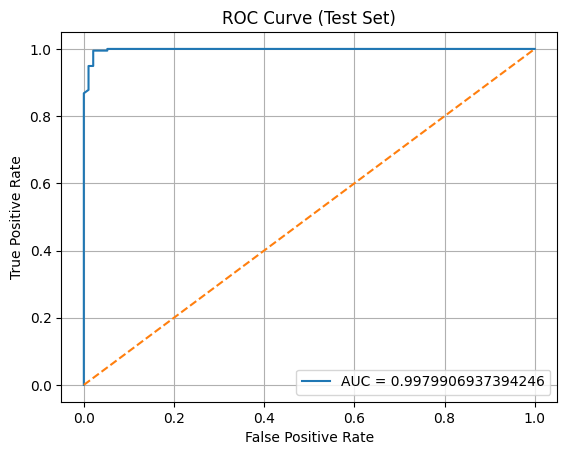

AUC: 0.9979906937394246


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_features=best_params_rf['max_features'],
    random_state=24
)
best_model.fit(X_train_scaled, y_train)

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_val = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_val}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC: {auc_val}")
